In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import torch

In [50]:
Model=model=tf.keras.models.load_model('Model10_sg')
EmbeddingSize=10

In [2]:
Data=torch.load('enverb_mfcc_features_154.pt')

In [3]:
words353_filename = 'EN-VERB-143.txt'
cname = ['desc','word1','word2','extra']
df = pd.read_csv(words353_filename, skiprows=11, sep='\t', names = cname )
 
column_values = df[["word1", "word2"]].values.ravel()
words_req =  pd.unique(column_values)

In [53]:
len(words_req)

125

In [54]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 20)                1920      
_________________________________________________________________
repeat_vector (RepeatVector) (None, 154, 20)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 154, 10)           1240      
_________________________________________________________________
time_distributed (TimeDistri (None, None, 13)          143       
Total params: 3,303
Trainable params: 3,303
Non-trainable params: 0
_________________________________________________________________


In [55]:
modelEnc = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
modelEnc.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_input (InputLa [(None, 154, 13)]         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 20)                1920      
Total params: 1,920
Trainable params: 1,920
Non-trainable params: 0
_________________________________________________________________


In [56]:
Data.keys()

dict_keys(['HAPPEN', 'SAY', 'MAKES', 'PRODUCED', 'ESTABLISHED', 'MAKE', 'CALLING', 'DEVELOPED', 'CONSIDERS', 'ORGANISING', 'CAUSES', 'ALLOWS', 'REQUIRING', 'MADE', 'SET', 'GAVE', 'SHOWS', 'GIVING', 'PRODUCES', 'RISE', 'SEEMED', 'FIND', 'FORM', 'EMPLOY', 'REFUSES', 'PROTECT', 'REPORTS', 'GIVES', 'EMPLOYED', 'SETS', 'STARTING', 'SHOWN', 'WORKS', 'USING', 'CALLS', 'USED', 'AFFECTING', 'CAUSE', 'STARTS', 'STRIKE', 'CONSIDERING', 'LEADING', 'REFUSED', 'AFFECTED', 'REPORTED', 'SHOW', 'USE', 'WORK', 'ALLOW', 'REQUIRES', 'EXIST', 'HELPING', 'CREATED', 'HAPPENS', 'PRODUCE', 'ESTABLISHING', 'INCREASING', 'SEEMS', 'START', 'SAID', 'LED', 'FOUND', 'TAKEN', 'SAYS', 'CONTINUE', 'REDUCING', 'REPORT', 'CREATING', 'PROVIDING', 'SHOWING', 'HAPPENING', 'GIVEN', 'WORKING', 'AFFECT', 'EXISTS', 'MAKING', 'APPLIES', 'TAKE', 'HELP', 'REFUSING', 'APPLY', 'SETTING', 'FINDS', 'ORGANISE', 'ALLOWED', 'ORGANISED', 'HELPED', 'RECOGNISE', 'CONSIDERED', 'INCREASES', 'HAPPENED', 'SHOWED', 'ESTABLISH', 'DEVELOPING', 'RE

In [57]:
modelEnc.predict(Data['HAPPEN'][0].T[np.newaxis, :])[0]

array([-2.6628992e-01,  1.7747833e-01, -2.3803394e-01, -2.2539394e-01,
       -2.5618362e-01, -1.9816814e-01,  1.4130335e-01, -8.0896430e-02,
       -2.7822509e-02, -1.9220144e-01, -2.8561788e-29,  0.0000000e+00,
        0.0000000e+00, -4.4486302e-36,  0.0000000e+00, -0.0000000e+00,
        1.0000000e+00,  1.3897443e-35,  7.0692449e-06,  1.6339547e-20],
      dtype=float32)

In [59]:
modelEnc.predict(Data['SAY'][0].T[np.newaxis, :])[0]

array([-2.6628897e-01,  1.7747748e-01, -2.3803325e-01, -2.2539322e-01,
       -2.5618261e-01, -1.9816664e-01,  1.4130284e-01, -8.0896012e-02,
       -2.7822340e-02, -1.9220074e-01, -3.2171941e-27,  2.4678711e-05,
        0.0000000e+00, -0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
        7.6374084e-01,  0.0000000e+00,  3.3499360e-02,  3.9969969e-01],
      dtype=float32)

In [60]:
Emb={}
for word in Data:
    # print(word)
    Embedding=np.zeros(EmbeddingSize)
    # print('total mfcc:',len(Data[word]))
    if(len(Data[word])!=0):
        for i in range(len(Data[word])):
            mfcc=Data[word][i].T
            # print(modelEnc.predict(mfcc[np.newaxis, :])[0][EmbeddingSize:-1])
            Embedding+=modelEnc.predict(mfcc[np.newaxis, :])[0][0:EmbeddingSize]
        Embedding=Embedding/len(Data[word])
    Emb[word]=Embedding


KeyboardInterrupt: 

In [ ]:
Emb['HAPPEN']

In [ ]:
Emb['SAY']

In [15]:
np.save('Emb_SG10',Emb)

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity


In [5]:
df

,desc,word1,word2,extra
0,rise,made,0.23,NaN
1,seemed,find,0.35,NaN
2,form,employ,0.19,NaN
3,refuses,protect,0.23,NaN
4,produced,reports,0.31,NaN
...,...,...,...,...
128,lead,require,0.20,NaN
129,affect,showed,0.21,NaN
130,pay,led,0.18,NaN
131,made,affect,0.23,NaN


In [18]:
words353_filename = "EN-VERB-143.txt"
cname = ['word1','word2','rating']
df = pd.read_csv(words353_filename, sep='\t', names = cname)
# df = df[['word1','word2','rating']]
data = np.load('Verb_Emb_SG30.npy', allow_pickle=True).item()

for k,v in data.items():
    data.update({k.upper(): v})


sim = []
for index, row in df.iterrows():
    w1 = row['word1'].upper()
    # print(w1)
    w2 = row['word2'].upper()
    # print(w2)
    sim.append(cosine_similarity(data[w1].reshape(1,-1), data[w2].reshape(1,-1)))
    # print(cosine_similarity(data[w1].reshape(1,-1), data[w2].reshape(1,-1)))


sim = np.array(sim).squeeze()
df['emb'] = sim

df.corr(method ='pearson')


,rating,emb
rating,1.000000,0.106277
emb,0.106277,1.000000


In [11]:
data.keys()

dict_keys(['HAPPEN', 'SAY', 'MAKES', 'PRODUCED', 'ESTABLISHED', 'MAKE', 'CALLING', 'DEVELOPED', 'CONSIDERS', 'ORGANISING', 'CAUSES', 'ALLOWS', 'REQUIRING', 'MADE', 'SET', 'GAVE', 'SHOWS', 'GIVING', 'PRODUCES', 'RISE', 'SEEMED', 'FIND', 'FORM', 'EMPLOY', 'REFUSES', 'PROTECT', 'REPORTS', 'GIVES', 'EMPLOYED', 'SETS', 'STARTING', 'SHOWN', 'WORKS', 'USING', 'CALLS', 'USED', 'AFFECTING', 'CAUSE', 'STARTS', 'STRIKE', 'CONSIDERING', 'LEADING', 'REFUSED', 'AFFECTED', 'REPORTED', 'SHOW', 'USE', 'WORK', 'ALLOW', 'REQUIRES', 'EXIST', 'HELPING', 'CREATED', 'HAPPENS', 'PRODUCE', 'ESTABLISHING', 'INCREASING', 'SEEMS', 'START', 'SAID', 'LED', 'FOUND', 'TAKEN', 'SAYS', 'CONTINUE', 'REDUCING', 'REPORT', 'CREATING', 'PROVIDING', 'SHOWING', 'HAPPENING', 'GIVEN', 'WORKING', 'AFFECT', 'EXISTS', 'MAKING', 'APPLIES', 'TAKE', 'HELP', 'REFUSING', 'APPLY', 'SETTING', 'FINDS', 'ORGANISE', 'ALLOWED', 'ORGANISED', 'HELPED', 'RECOGNISE', 'CONSIDERED', 'INCREASES', 'HAPPENED', 'SHOWED', 'ESTABLISH', 'DEVELOPING', 'RE

In [12]:
def embeddingPlotTSNE(X,words):
    import numpy as np
    from sklearn.manifold import TSNE
    plt.rcParams["figure.figsize"] = (10,10)
    # plt.xlim(-300,300)
    # plt.ylim(-200,200)
    X_embedded = TSNE(n_components=2).fit_transform(X)
    X_embedded.shape
    for word in range(len(words)):
        x, y = X_embedded[word][0],X_embedded[word][1]
        plt.scatter(x, y, marker='.', color='red')
        plt.text(x+10, y+1, words[word], fontsize=9)
        plt.title('t-SNE projection of the word embeddings')
    # plt.show()
def embeddingPlotPCA(X,words):
    import numpy as np
    from sklearn.decomposition import PCA
    plt.rcParams["figure.figsize"] = (10,10)
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    X_embedded2 = PCA(n_components=2).fit_transform(X)
    X_embedded2.shape
    for word in range(len(words)):
        x, y = X_embedded2[word][0],X_embedded2[word][1]
        plt.scatter(x, y, marker='.', color='red')
        plt.text(x+10, y+1, words[word], fontsize=9)
        plt.title('t-SNE projection of the word embeddings')
    # plt.show()
def embeddingPlotTSNE_green(X,words):
    import numpy as np
    from sklearn.manifold import TSNE
    X_embedded1 = TSNE(n_components=2).fit_transform(X)
    X_embedded1.shape
    for word in range(len(words)):
        x, y = X_embedded1[word][0],X_embedded1[word][1]
        plt.scatter(x, y, marker='.', color='green')
        plt.text(x+10, y+1, words[word], fontsize=9)
        plt.title('t-SNE projection of the word embeddings')

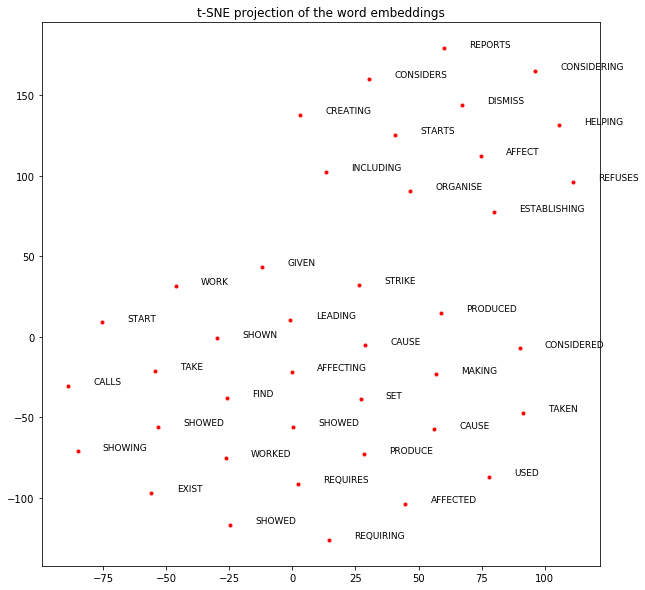

In [193]:
embeddingPlotTSNE(emb2,words2)

In [134]:
data.keys()

dict_keys(['HAPPEN', 'SAY', 'MAKES', 'PRODUCED', 'ESTABLISHED', 'MAKE', 'CALLING', 'DEVELOPED', 'CONSIDERS', 'ORGANISING', 'CAUSES', 'ALLOWS', 'REQUIRING', 'MADE', 'SET', 'GAVE', 'SHOWS', 'GIVING', 'PRODUCES', 'RISE', 'SEEMED', 'FIND', 'FORM', 'EMPLOY', 'REFUSES', 'PROTECT', 'REPORTS', 'GIVES', 'EMPLOYED', 'SETS', 'STARTING', 'SHOWN', 'WORKS', 'USING', 'CALLS', 'USED', 'AFFECTING', 'CAUSE', 'STARTS', 'STRIKE', 'CONSIDERING', 'LEADING', 'REFUSED', 'AFFECTED', 'REPORTED', 'SHOW', 'USE', 'WORK', 'ALLOW', 'REQUIRES', 'EXIST', 'HELPING', 'CREATED', 'HAPPENS', 'PRODUCE', 'ESTABLISHING', 'INCREASING', 'SEEMS', 'START', 'SAID', 'LED', 'FOUND', 'TAKEN', 'SAYS', 'CONTINUE', 'REDUCING', 'REPORT', 'CREATING', 'PROVIDING', 'SHOWING', 'HAPPENING', 'GIVEN', 'WORKING', 'AFFECT', 'EXISTS', 'MAKING', 'APPLIES', 'TAKE', 'HELP', 'REFUSING', 'APPLY', 'SETTING', 'FINDS', 'ORGANISE', 'ALLOWED', 'ORGANISED', 'HELPED', 'RECOGNISE', 'CONSIDERED', 'INCREASES', 'HAPPENED', 'SHOWED', 'ESTABLISH', 'DEVELOPING', 'RE

In [135]:
import matplotlib.pyplot as plt

In [136]:
data.keys()

dict_keys(['HAPPEN', 'SAY', 'MAKES', 'PRODUCED', 'ESTABLISHED', 'MAKE', 'CALLING', 'DEVELOPED', 'CONSIDERS', 'ORGANISING', 'CAUSES', 'ALLOWS', 'REQUIRING', 'MADE', 'SET', 'GAVE', 'SHOWS', 'GIVING', 'PRODUCES', 'RISE', 'SEEMED', 'FIND', 'FORM', 'EMPLOY', 'REFUSES', 'PROTECT', 'REPORTS', 'GIVES', 'EMPLOYED', 'SETS', 'STARTING', 'SHOWN', 'WORKS', 'USING', 'CALLS', 'USED', 'AFFECTING', 'CAUSE', 'STARTS', 'STRIKE', 'CONSIDERING', 'LEADING', 'REFUSED', 'AFFECTED', 'REPORTED', 'SHOW', 'USE', 'WORK', 'ALLOW', 'REQUIRES', 'EXIST', 'HELPING', 'CREATED', 'HAPPENS', 'PRODUCE', 'ESTABLISHING', 'INCREASING', 'SEEMS', 'START', 'SAID', 'LED', 'FOUND', 'TAKEN', 'SAYS', 'CONTINUE', 'REDUCING', 'REPORT', 'CREATING', 'PROVIDING', 'SHOWING', 'HAPPENING', 'GIVEN', 'WORKING', 'AFFECT', 'EXISTS', 'MAKING', 'APPLIES', 'TAKE', 'HELP', 'REFUSING', 'APPLY', 'SETTING', 'FINDS', 'ORGANISE', 'ALLOWED', 'ORGANISED', 'HELPED', 'RECOGNISE', 'CONSIDERED', 'INCREASES', 'HAPPENED', 'SHOWED', 'ESTABLISH', 'DEVELOPING', 'RE

In [187]:
words=[]
emb=[]
for word in data:
    words.append(word)
    emb.append(data[word])


In [147]:
len(words)

117

In [190]:
words=np.asarray(words)

In [189]:
emb=np.asarray(emb)

In [185]:
ind=np.random.randint(low=0, high=117, size=40)

In [32]:
sim.shape

(144,)

In [19]:
from scipy import stats
from sklearn.preprocessing import normalize

In [20]:
from scipy import stats
stats.spearmanr(df['emb'].values, df['rating'].values)

SpearmanrResult(correlation=0.12303626022326432, pvalue=0.14179066439798935)

In [30]:
words=['PROTECTS','HAPPEN','REQUIRE','RECOGNISE','HELPED','USING','WORK','GIVING']
emb=[data['PROTECTS'],data['HAPPEN'],data['REQUIRE'],data['RECOGNISE'],data['HELPED'],data['USING'],data['WORK'],data['GIVING']]

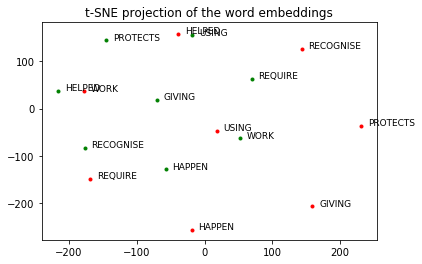

In [31]:
embeddingPlotTSNE(emb,words)
embeddingPlotTSNE_green(emb,words)


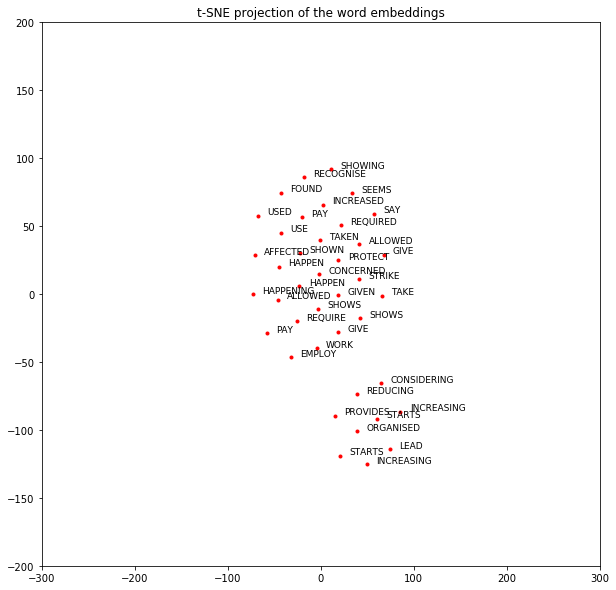

In [176]:
embeddingPlotTSNE(emb2,words2)